# Extra - Factor Models and the Tangency

### Weight on the Tangency portfolio

We looked at the tangency portfolio weights of the securities and factors.

* Are these weights "significant"? 
* That is, are we sure that these weights are not just the 4 factors plus random noise?

It turns out that running OLS of y=1 on X = returns gives us the tangency weights. 
* (They are a scaled version, but that doesn't matter.) 

Since this comes from regression betas, we also automatically get the t-stats and p-values. 
* If the p-values are less than .05, then we say the regressor is statistically significant at the 5th percentile.

Let's see whether the factors are the only significant weights when included with the equities.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
facs = pd.read_excel('../data/factor_pricing_data.xlsx',sheet_name='factors (excess returns)').set_index('Date')
assets = pd.read_excel('../data/factor_pricing_data.xlsx',sheet_name='portfolios (excess returns)').set_index('Date')

FREQ = 12

In [3]:
temp = sm.add_constant(assets.join(facs))
X = temp.drop(columns=['const','RMW','CMA'])
y = temp[['const']]
mod = sm.OLS(y,X).fit()
pvals = mod.pvalues

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


def plot_bar_pvals(pvals,figsize_vals=(6,4)):

    pvals_sorted = pvals.sort_values(ascending=False)

    colors = pvals_sorted.apply(
        lambda v: 'C3'    if v < 0.01 
                else 'orange' if v < 0.05 
                else 'C0'
    )
        
    fig, ax = plt.subplots(figsize=figsize_vals)
    pvals_sorted.plot.barh(
        ax=ax,
        color=colors,
        legend=False
    )
    ax.set_xscale('log')                  # ← switch to log scale
    ax.set_xlabel('Value (log scale)')
    ax.set_title('Values on a log scale')


    patch01    = mpatches.Patch(color='C3',    label='p < 1%')
    patch05 = mpatches.Patch(color='orange', label='0.01 ≤ p < 5%')
    patchInsig  = mpatches.Patch(color='C0',  label='p ≥ 5%')

    # add the legend
    ax.legend(
        handles=[patch01, patch05, patchInsig],
        title='Thresholds',
        loc='upper right'          # choose best location
    )

    return fig, ax

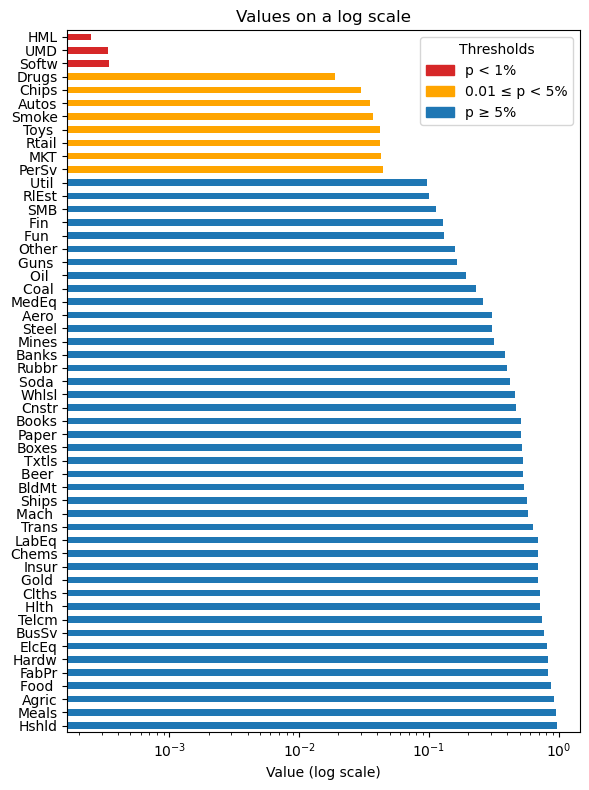

In [5]:
fig, ax = plot_bar_pvals(pvals,(6,8))
plt.tight_layout()
plt.show()

The p-values for MKT, HML, and UMD are less than .05, saying they're significant in testing. 

However, we also see significance (p-value less than .05) in many of the test assets.

***

# Spanning Factors

### Do the extra 3 factors beyond the CAPM help much?

We could see whether the tangency portfolio is improved much by using the four factors (versus just using MKT.)

In [6]:
temp = sm.add_constant(facs)
X = temp[['MKT','SMB','HML','UMD']]
y = temp[['const']]

mod = sm.OLS(y,X).fit()

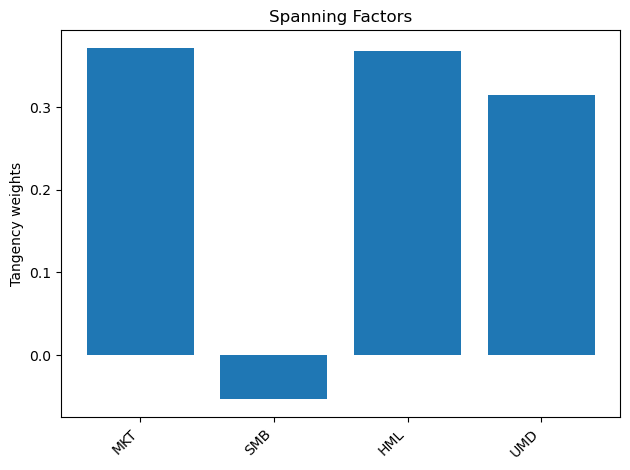

In [7]:
betas = mod.params
wts = betas/betas.sum()

fig, ax = plt.subplots()
ax.bar(wts.index, wts.values)
ax.set_ylabel("Tangency weights")
ax.set_title("Spanning Factors")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

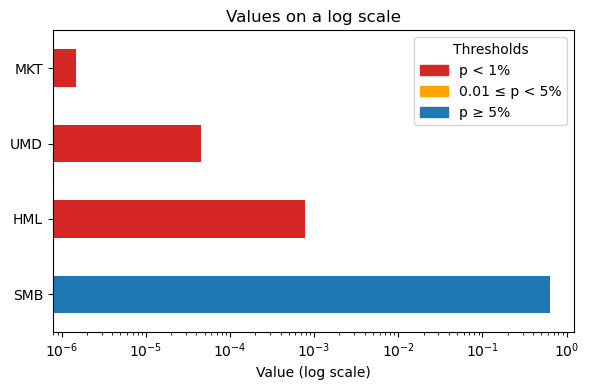

In [8]:
pvals = mod.pvalues

fig, ax = plot_bar_pvals(pvals)
plt.tight_layout()
plt.show()